# Feature selection

In [1]:
import pandas as pd
from sklearn.feature_selection import RFE

In [2]:
df_train = pd.read_csv('../src/ddg_bin_train.csv')
df_test = pd.read_csv('../src/ddg_bin_test.csv')

In [3]:
def return_array(df:pd.DataFrame):
    X = df.iloc[:,0:len(df.columns)-1]
    y = pd.get_dummies(df['ddGC'])
    y = y['stable']
    return X,y

In [4]:
X_train, y_train = return_array(df_train)
X_test, y_test = return_array(df_test)

# RF Feature Selection (ddG Bin)

In [5]:
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# clf = SVC(C=100,gamma='scale',kernel='linear') # kernel changed to linear
clf = RandomForestClassifier()
selector = RFE(clf, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selector.ranking_

array([4, 1, 2, 3, 5, 1, 1, 1, 1])

{'ddG_calc': 'Rosetta ddG monomer calculation', 'delta_SASA': 'Solvent access surface area', 'delta_VdwV': 'Van der Waals volumn', 'delta_Hydro': 'Hydrophobicity', 'ASA_pct': 'Percentage accessible area of the mutation residue'}


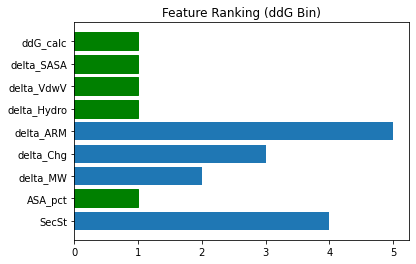

In [6]:
import matplotlib.pyplot as plt
bar = plt.barh(X_train.columns,selector.ranking_)
bar[1].set_color('green')
bar[5].set_color('green')
bar[6].set_color('green')
bar[7].set_color('green')
bar[8].set_color('green')
plt.title("Feature Ranking (ddG Bin)")

labels = {
    "ddG_calc": "Rosetta ddG monomer calculation",
    "delta_SASA": "Solvent access surface area",
    "delta_VdwV": "Van der Waals volumn",
    "delta_Hydro": "Hydrophobicity",
    "ASA_pct": "Percentage accessible area of the mutation residue"
}
print(labels)

# RF Feature Selection (dTm Bin)

In [7]:
df_train = pd.read_csv('../src/dTm_bin_train.csv')
df_test = pd.read_csv('../src/dTm_bin_test.csv')

def return_array(df:pd.DataFrame):
    X = df.iloc[:,0:len(df.columns)-1]
    y = pd.get_dummies(df['dTmC'])
    y = y['stable']
    return X,y

X_train, y_train = return_array(df_train)
X_test, y_test = return_array(df_test)

clf = RandomForestClassifier()
selector = RFE(clf, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selector.ranking_

array([4, 1, 2, 3, 5, 1, 1, 1, 1])

{'ddG_calc': 'Rosetta ddG monomer calculation', 'delta_SASA': 'Solvent access surface area', 'delta_VdwV': 'Van der Waals volumn', 'delta_Hydro': 'Hydrophobicity', 'ASA_pct': 'Percentage accessible area of the mutation residue'}


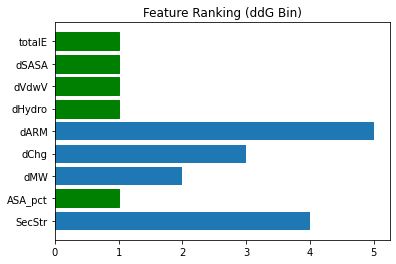

In [8]:
import matplotlib.pyplot as plt
bar = plt.barh(X_train.columns,selector.ranking_)
bar[1].set_color('green')
bar[5].set_color('green')
bar[6].set_color('green')
bar[7].set_color('green')
bar[8].set_color('green')
plt.title("Feature Ranking (ddG Bin)")
labels = {
    "ddG_calc": "Rosetta ddG monomer calculation",
    "delta_SASA": "Solvent access surface area",
    "delta_VdwV": "Van der Waals volumn",
    "delta_Hydro": "Hydrophobicity",
    "ASA_pct": "Percentage accessible area of the mutation residue"
}
print(labels)

<img src="../src/feature_ranking.png" style="height: 250px; width:1000px"/>

<img src="../src/model.png" style="height: 800x; width:500px"/>